In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk

from patsy import dmatrix

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

C:\Users\LG\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv("train_v1.csv")

In [3]:
train.tail()

,Unnamed: 0,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription,FinelineNumber,standard_upc,company_code,product_code
647049,647049,39,191346,Sunday,1,PHARMACY OTC,1118.0,323900017788,23900,01778
647050,647050,39,191346,Sunday,1,FROZEN FOODS,1752.0,078742053363,78742,05336
647051,647051,39,191346,Sunday,1,PRODUCE,4170.0,000000040723,040,72
647052,647052,8,191347,Sunday,1,DAIRY,1512.0,041900076641,41900,07664
647053,647053,8,191347,Sunday,1,GROCERY DRY GOODS,3600.0,038000596551,38000,59655


In [4]:
train["Count"] = 1

In [5]:
dd = train.pivot_table(values="Count", index=["TripType"], columns=["DepartmentDescription"], aggfunc=np.average, dropna=False, fill_value=0)
dds = list(dd.columns)
total_dds = []
for column in dds:
    s = dd[column].sum()
    total_dds.append(s)
dd_total = pd.DataFrame(index=dds, data=total_dds, columns=["total"])
dd_total = dd_total.sort_values(by=['total'], ascending=False)
dd_total.reset_index(inplace=True)
dd_total.rename(columns={"index":"DepartmentDescription"})

,DepartmentDescription,total
0,IMPULSE MERCHANDISE,38
1,OFFICE SUPPLIES,38
2,CELEBRATION,38
3,HOUSEHOLD PAPER GOODS,38
4,GROCERY DRY GOODS,37
5,FROZEN FOODS,37
6,HOME DECOR,37
7,HOME MANAGEMENT,37
8,HOUSEHOLD CHEMICALS/SUPP,37
9,SERVICE DELI,37


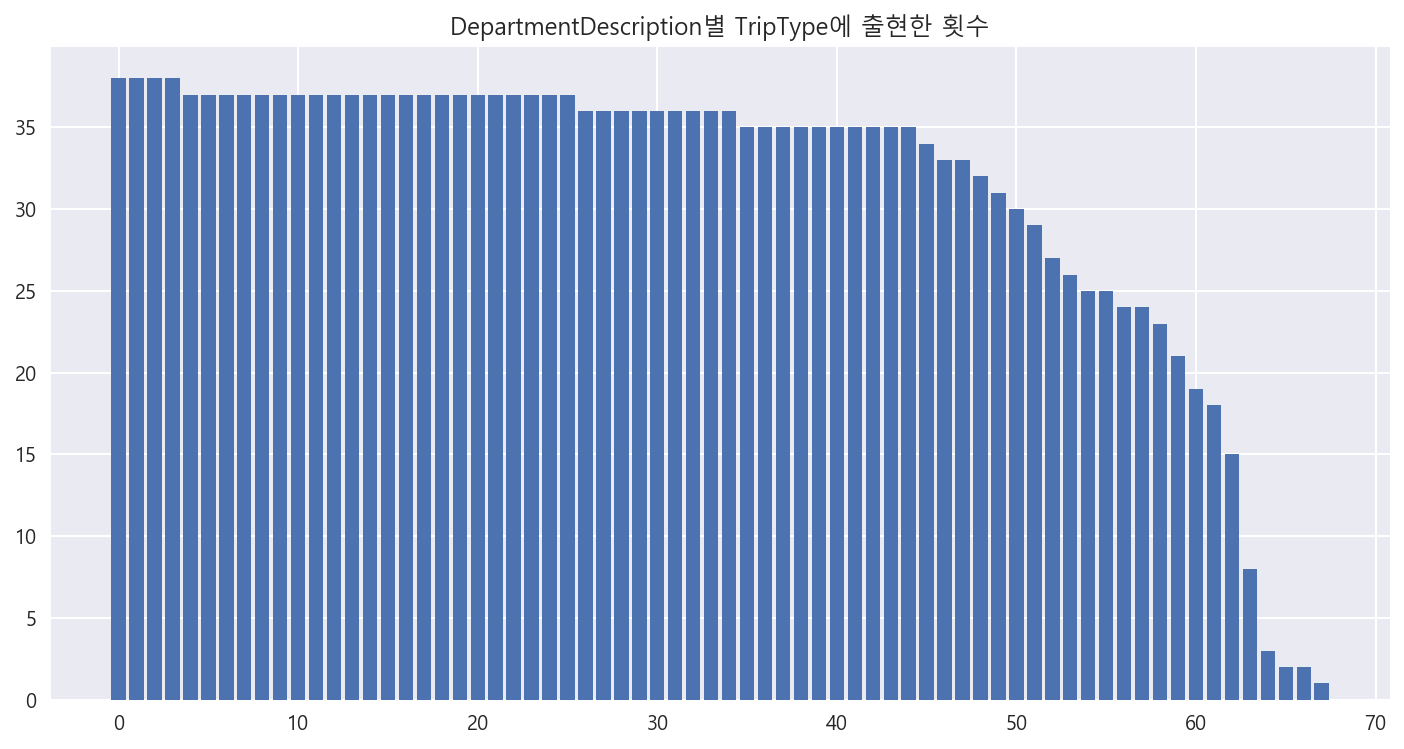

In [6]:
plt.figure(figsize=(12, 6))
plt.bar(dd_total.index, dd_total["total"])
plt.title("DepartmentDescription별 TripType에 출현한 횟수")
plt.show()

In [7]:
fn = train.pivot_table(values="Count", index=["TripType"], columns=["FinelineNumber"], aggfunc=np.average, dropna=False, fill_value=0)
fns = list(fn.columns)
total_fns = []
for column in fns:
    s = fn[column].sum()
    total_fns.append(s)
fn_total = pd.DataFrame(index=fns, data=total_fns, columns=["total"])
fn_total = fn_total.sort_values(by=['total'], ascending=False)
fn_total.reset_index(inplace=True)
fn_total.rename(columns={"index":"FinelineNumber"})

,FinelineNumber,total
0,0.0,37
1,100.0,37
2,115.0,37
3,601.0,37
4,3467.0,37
5,135.0,37
6,4010.0,37
7,808.0,37
8,1508.0,36
9,205.0,36


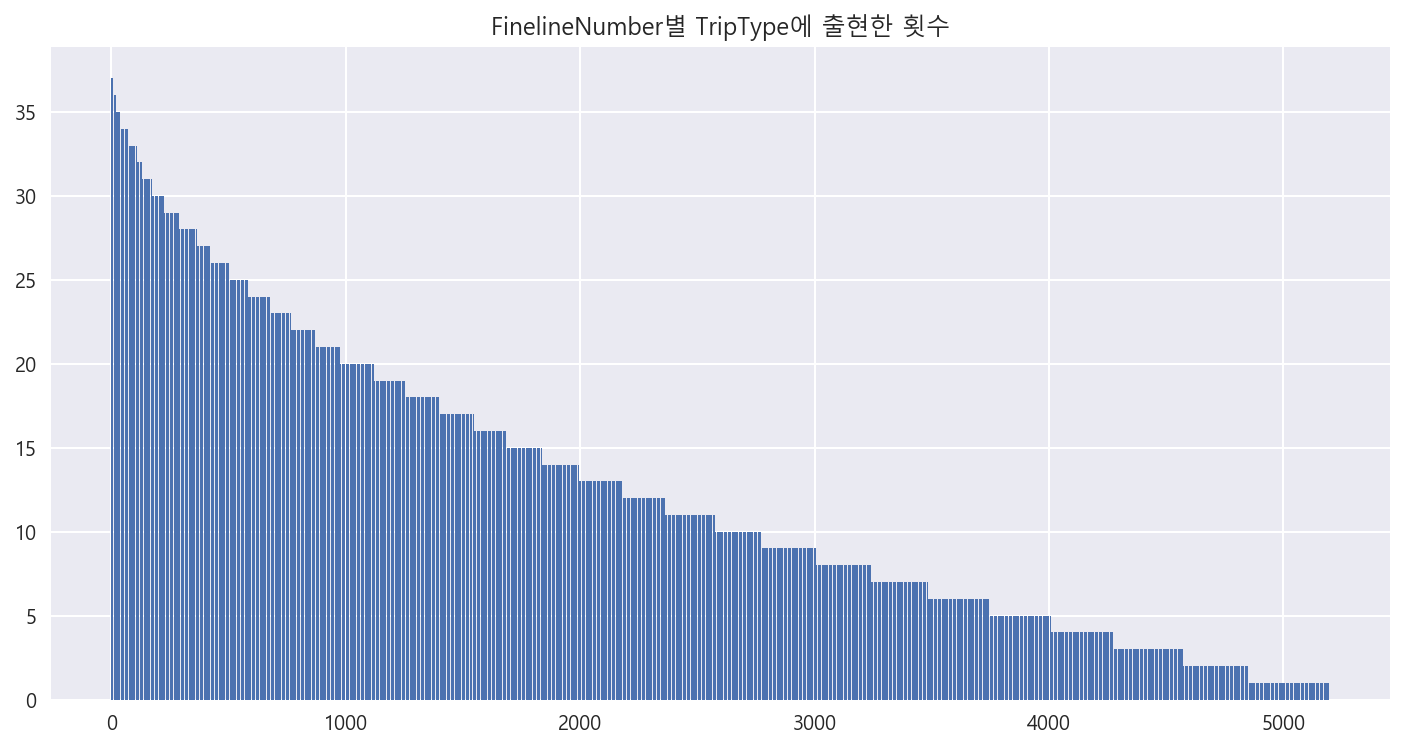

In [8]:
plt.figure(figsize=(12, 6))
plt.bar(fn_total.index, fn_total["total"])
plt.title("FinelineNumber별 TripType에 출현한 횟수")
plt.show()

In [9]:
cc = train.pivot_table(values="Count", index=["TripType"], columns=["company_code"], aggfunc=np.average, dropna=False, fill_value=0)
ccs = list(cc.columns)
total_ccs = []
for column in ccs:
    s = cc[column].sum()
    total_ccs.append(s)
cc_total = pd.DataFrame(index=ccs, data=total_ccs, columns=["total"])
cc_total = cc_total.sort_values(by=['total'], ascending=False)
cc_total.reset_index(inplace=True)
cc_total.rename(columns={"index":"company_code"})

,company_code,total
0,81131,38
1,05388,38
2,34000,38
3,37000,37
4,36000,37
5,28000,37
6,28400,37
7,12546,37
8,79400,37
9,78742,37


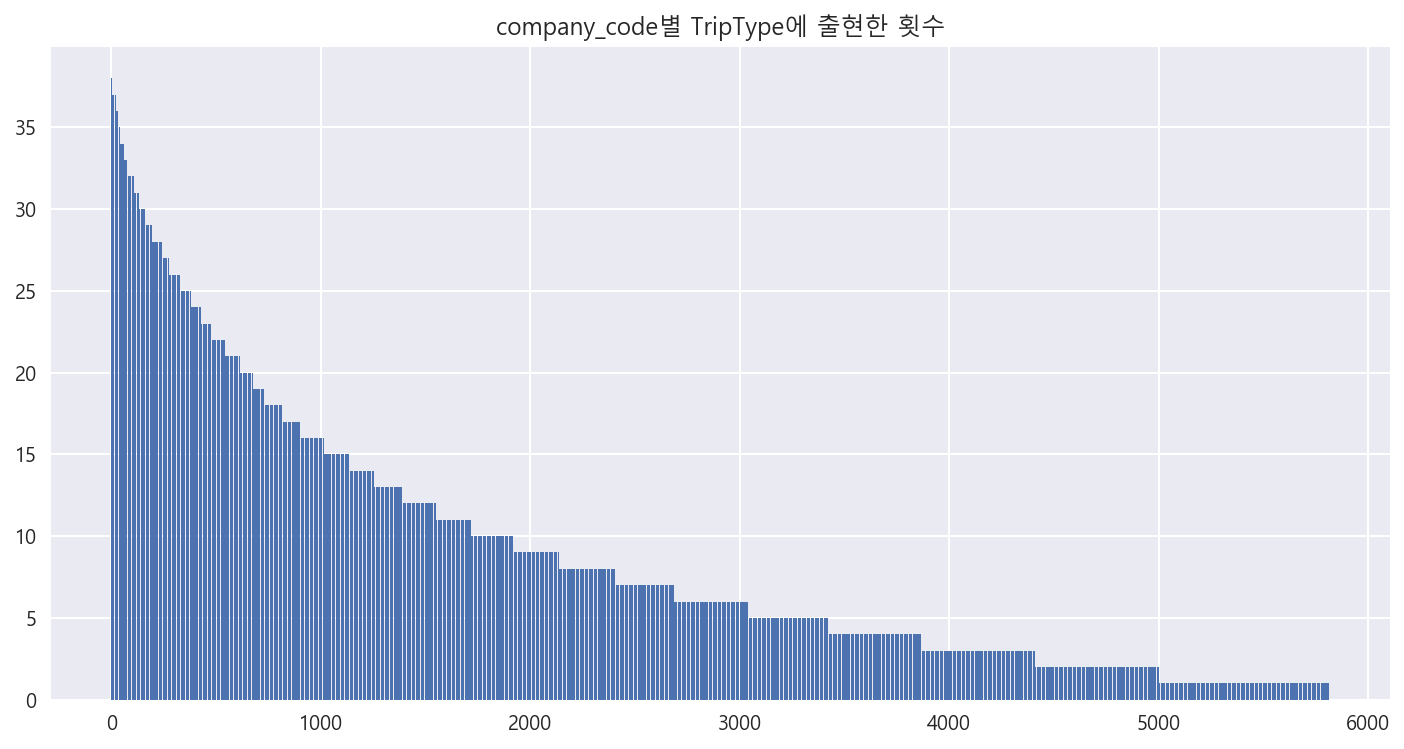

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(cc_total.index, cc_total["total"])
plt.title("company_code별 TripType에 출현한 횟수")
plt.show()

In [11]:
pc = train.pivot_table(values="Count", index=["TripType"], columns=["product_code"], aggfunc=np.average, dropna=False, fill_value=0)
pcs = list(pc.columns)
total_pcs = []
for column in pcs:
    s = pc[column].sum()
    total_pcs.append(s)
pc_total = pd.DataFrame(index=pcs, data=total_pcs, columns=["total"])
pc_total = pc_total.sort_values(by=['total'], ascending=False)
pc_total.reset_index(inplace=True)
pc_total.rename(columns={"index":"product_code"})

,product_code,total
0,00000,37
1,missing,36
2,62128,36
3,62097,36
4,11,36
5,20027,35
6,07862,35
7,00044,34
8,05010,34
9,35186,34


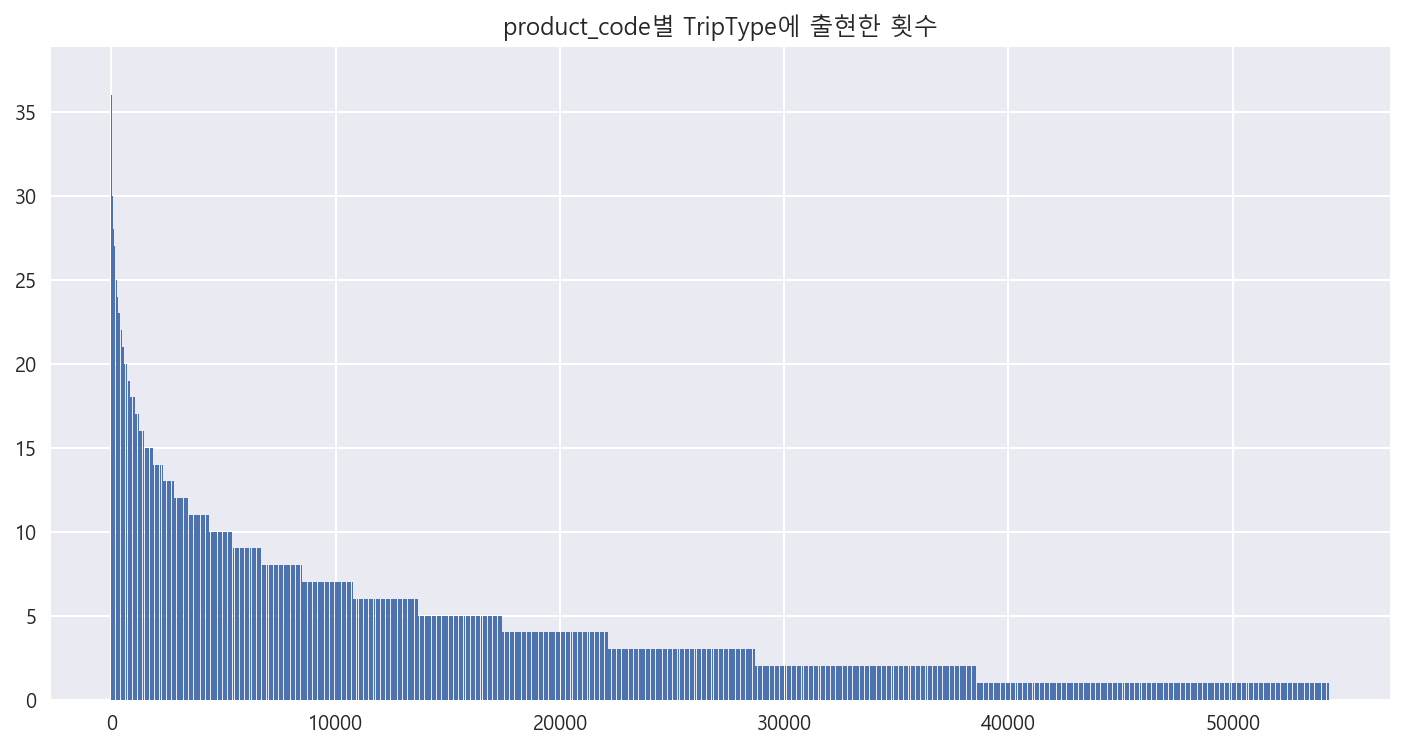

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(pc_total.index, pc_total["total"])
plt.title("product_code별 TripType에 출현한 횟수")
plt.show()